# Chapter 6

Gordon Richards (2016, 2018, 2020)

In Chapter 6 we will cover the following topics
* Non-parametric Density Estimation, specifically Kernel Density Estimation (KDE)
* $k$-Nearest Neighbor Density Estimation
* Parametric Density Estimation, specifically Gaussian Mixture Models (GMM)
* Clustering algorithms, particularly $K$-means

## Kernel Density Estimation (KDE)

Inferring the pdf of a sample of data is known as *density estimation*.  Essentially we are smoothing the data.

Density estimation is useful because identifying low probability regions can help uncover rare sources.  Similarly, if the data can be divided into subsamples, one can estimate the pdf for each subsample and, in turn, determine classifications for new objects.

*Nonparametric* density estimation is useful when we know nothing about the underlying distribution of the data since we don't have to specify a model.  This flexibility allows us to capture the shape of the distribution well, at the expense of more difficulty interpreting the results.

[*Kernel Density Estimation (KDE)*](https://en.wikipedia.org/wiki/Kernel_density_estimation) is the standard here (and, incidentally, is something that we have been doing in my group for about 15 years now).

Let's start by recalling the experiment that we did with 1-D histograms in the first week of class.  

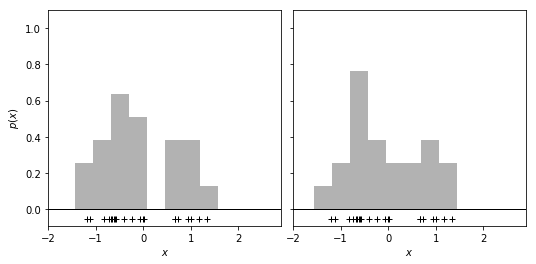

In [1]:
# Modified from Ivezic, Figure 6.1
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

#------------------------------------------------------------
# Draw the random data
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14), np.random.normal(1, 0.3, size=7)])


#------------------------------------------------------------
# First figure: silly histogram binning
fig1 = plt.figure(figsize=(8, 4))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05, bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, density=True, histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

#Shift bin centers by 0.25
ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, density=True, histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

plt.show()

The underlying distribution in both panels is the same, that is the data points that make up the histogram are the same.  All we have done is shifted the locations of the bins by 0.25.
As we saw in Lecture 2, the choice of bin centers can really change the histogram that we make.

The next panels are what happens if we center the bins on each point.  This is an example of kernel density estimation using a "top-hat" kernel.  It is a good description of the data, but is pretty ugly.

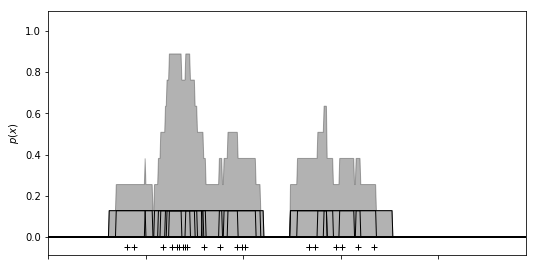

In [2]:
fig1b = plt.figure(figsize=(8, 4))
fig1b.subplots_adjust(left=0.12, right=0.95, wspace=0.05, bottom=0.1, top=0.95, hspace=0.05)

ax = fig1b.add_subplot(111)
ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')

We can make it look nicer by choosing a different kernel.  That is by choosing a different bin shape.  The next 3 plots show KDEs using Gaussian kernels with different width Gaussians.

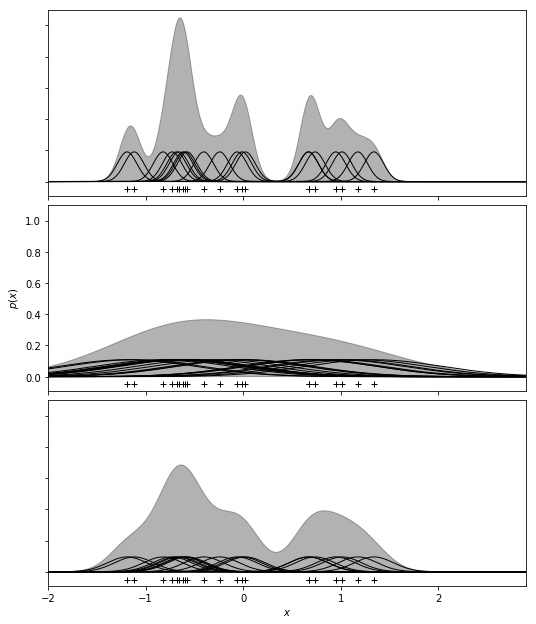

In [3]:
#------------------------------------------------------------
# First figure: transition to KDE
fig2 = plt.figure(figsize=(8, 8))
fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05, bottom=0.0, top=1.0, hspace=0.05)

ax = fig2.add_subplot(311)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.1)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

ax = fig2.add_subplot(312)
ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.7)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')

ax = fig2.add_subplot(313)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

This looks better, but gives us a "Goldilocks" problem.  The first plot uses a kernel that is too narrow.  The second is too wide.  The third is "just right".

We can think of KDE as replacing the points with "clouds".  Each cloud is described by the kernel $K(u)$, where $K(u)$ can be any function that is smooth, is postive definite, normalizes to unity, has a mean of 0, and has a positive variance. 

A common kernel is the Gaussian kernel that we just used above:

$$K(u) = \frac{1}{(2\pi)^{D/2}}\exp^{-u^2/2}$$

Note that the "$D$" is necessary because while histograms are generally 1-D, the kind of Big Data analysis that we are interested in will be $N$-D.

Once a kernel is chosen the kernel density estimate at a given point, $x$, is given by 
$$ \hat{f}(x) = \frac{1}{Nh^D}\sum_{i=1}^N K\left(\frac{d(x,x_i)}{h}\right),$$
where $\hat{f}$ is an *estimator* of our distribution.

Where does this come from?  Well if you wanted to know the density of points you could compute
$\frac{\sum_1^N\delta (x-x_i)}{V},$ where $\delta (x-x_i)$ is the Delta function, $V$ is the volume, and $N$ is the number of points.  In $D$-dimensional space a volume element is just $h^D$.  Then instead of representing our observation as a delta function, we represent it by our kernel function.  To normalize for the number of points, divide by $N$.

The argument of $K$ is just some measure of the distance between $x$ and each $x_i$.  Normally $d(x,x_i) = (x-x_i)$.  For the gaussian kernel that makes $h=\sigma$.  Take a second to convince yourself that that is the case.  So, you can see how $h$ represents the "width" or what is usually called the "bandwidth" in this context.

You might wonder why the book uses $\hat{f}$ instead of just $f$ since we already are using $f$ instead of $h$ (the true distribution). I don't know.

Here is a comparison of some different possible kernels.  The one that I use most commonly is actually an Epanechnikov kernel since the Gaussian and Exponential have rather long tails.
![Ivezic, Figure 6.2](http://www.astroml.org/_images/fig_kernels_1.png)

We won't go through the math, but it turns out that the Epanechnikov kernel is "optimal" in the sense of minimizing the variance.  That kernel is given by $$K(x) = \frac{3}{4}(1-x^2),$$
for $|x|\le 1$ and 0 otherwise. Below is the code that produces the plot above.  

You are going to add the Epanechnikov kernel to it.

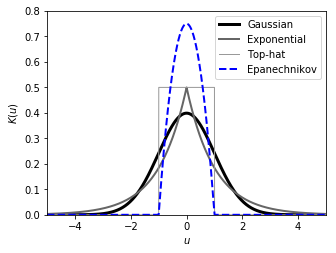

In [4]:
# Complete and Execute
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Compute Kernels.
u = np.linspace(-5, 5, 10000)
du = u[1] - u[0]

gauss = (1. / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u ** 2)

exp = 0.5 * np.exp(-abs(u))

tophat = 0.5 * np.ones_like(u)
tophat[abs(u) > 1] = 0

ep = 0.75*(1-u**2)  # Add the Epanechnikov kernel function
ep[abs(u)>1]=0 # Set the range of the kernel

#ep = ____  # Add the Epanechnikov kernel function
#ep[____]=0 # Set the range of the kernel

#------------------------------------------------------------
# Plot the kernels
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)

ax.plot(u, gauss, '-', c='black', lw=3, label='Gaussian')
ax.plot(u, exp, '-', c='#666666', lw=2, label='Exponential')
ax.plot(u, tophat, '-', c='#999999', lw=1, label='Top-hat')
ax.plot(u, ep, '--', c='blue', lw=2, label='Epanechnikov')  # Add the Epanechnikov kernel to the plot
#ax.plot(__,__,__,__,label='Epanechnikov')  # Add the Epanechnikov kernel to the plot

ax.legend(loc=1)

ax.set_xlabel('$u$')
ax.set_ylabel('$K(u)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.8001)
plt.show()

The crucial part of KDE is to determine the optimal value for the width of the kernel.  When we first discussed histograms and KDE we talked about theoretical computation of optimal bandwidths.  Let's now look at how we can empirically determine the optimal bandwidth through [**cross validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

Cross validation is related to the construction of training and test sets that we talked about last time.  There are a number of different ways to do this.  For example, you could *randomly sample* to decide which data goes into the training or test sets:
![Random Sample Cross Validation Example; Remesan Figure 3.7](http://i.stack.imgur.com/4Lrff.png)

Where we aren't just doing this once, but rather many times so that each data point is treated both as a training point and as a test point.

We could do this in a more ordered way (e.g., to make sure that each point gets sampled as training/test the same number of times) and do a $K$-fold cross validation.  Here $K$ is the number of "experiments" that need to be done so that each data point appears in a test sample once.

![K-Fold Cross Validation Example; Remesan Figure 3.8](http://i.stack.imgur.com/fhMza.png)

We can take that to the extreme by having $K\equiv N$, so that in each experiment we leave out just one object.  This is called "Leave-One-Out" cross validation:

![Leave-One-Out Cross Validation Example; Remesan Figure 3.9](http://images.slideplayer.com/16/4977882/slides/slide_35.jpg)

We can implement this in Scikit-Learn with [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and replot our histogram above as follows:

In [6]:
# Complete and Execute this cell to determine the bandwidth
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
K = 5 # 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) 
grid.fit(x[:, None]) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print(h_opt)

0.131034482759


(-0.09, 1.1)

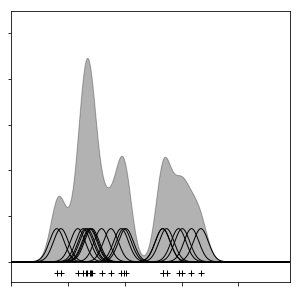

In [7]:
# Execute this cell to see the new "histogram"
fig2 = plt.figure(figsize=(5, 5))
ax = fig2.add_subplot(111)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], h_opt)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

## 2-D Histograms

Here is some sample code using [`sklearn.neighbors.KernelDensity`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html).  Play around with this and see how it works.  Make different variations of the plot.  (For example, try `bandwidth=0.01` to `bandwidth=1.0`.)  What we are doing here is using KDE to set the plot color to indicate the relative density of the points.  This is essentially a 2-D histogram.

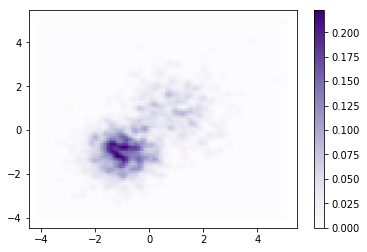

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

# Two 2-D normal distributions with offset centroids
# See what happens when you make changes to the next 2 lines.
X = np.concatenate([np.random.normal([-1,-1],[0.75,0.75],size=(1000,2)),np.random.normal([1,1],[1,1],size=(500,2))]) 
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(X) #fit the model to the data

u = v = np.linspace(-4,5,80)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0],Xgrid[:,1], c=dens, cmap="Purples", edgecolor="None")
plt.colorbar()

Now copy the example from above to a new cell and splice in the cross validation code to produce a new plot with the "optimal" bandwidth.  Try `bandwidth=0.01` and `bandwidth=1.0`.  Basically, splice in the lines of code for `GridSearchCV` between the lines setting `X` and instantiating `kde`.

0.39387755102


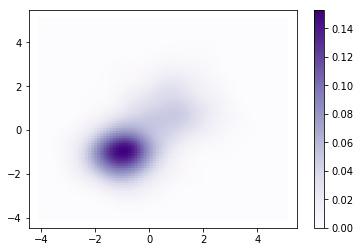

In [9]:
import numpy as np
from sklearn.neighbors import KernelDensity

X = np.concatenate([np.random.normal([-1,-1],[0.75,0.75],size=(1000,2)),np.random.normal([1,1],[1,1],size=(500,2))]) 

bwrange = np.linspace(0.01, 1.0, 50) # Test 50 bandwidths from 0.1 to 1.0
K = 5 # 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) 
grid.fit(X)
h_opt = grid.best_params_['bandwidth']
print h_opt

kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X) #fit the model to the data
u = v = np.linspace(-4,5,80)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0],Xgrid[:,1], c=dens, cmap="Purples", edgecolor="None")
plt.colorbar()

Now copy the example from above to a new cell and splice in the cross validation code to produce a new plot with the "optimal" bandwidth.  Basically, splice in the lines of code for `GridSearchCV` between the lines setting `X` and instantiating `kde`, choosing an appropriate range of bandwidths to test.  What is the bandwidth that is chosen?